<a href="https://colab.research.google.com/github/AhmadFadlulloh23/Machine_Learning/blob/main/UTS_Machine_Learning_Ahmad_Fadlulloh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AHMAD FADLULLOH
#1103213040
#UTS ML
#MODEL RANDOM FOREST & XGBOOST
#DATASET TRAIN

# INPUT LIBARY

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# INPUT DATASET

In [ ]:
# Baca file .csv dari GDrive
train = pd.read_csv('train.csv', dtype={'Column26': str})
test = pd.read_csv('test.csv', dtype={'Column26': str})

# Tampilkan baris dari dataframe 'train' dan test
train.head()
test.head()

<ipython-input-10-10c56695c9ee>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv', dtype={'Column26': str})


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


# MENAMPILKAN INFO DATA


In [ ]:
print("\nData Test\n")
print(train.head(5))
print(test.head(5))


Data Test

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization

In [ ]:
train.info()
print("\n\n")
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
# Menghapus kolom yang tidak diperlukan
cols_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_History_Age', 'Type_of_Loan']
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)
train.describe()
test.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,14523.000000,17100.000000,17100.000000,17100.000000,17100.000000,16734.000000,17099.000000,17099.000000
mean,4278.303757,17.338012,24.168772,68.506784,21.007018,31.867635,32.268430,1486.245978
std,3232.485255,117.412428,133.152709,453.388245,14.736783,203.950210,5.103569,8552.286306
min,332.128333,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1659.495013,3.000000,4.000000,7.000000,10.000000,4.000000,28.075628,33.191473
50%,3166.331667,6.000000,6.000000,13.000000,18.000000,7.000000,32.243161,76.182536
75%,6060.064625,8.000000,7.000000,20.000000,28.000000,10.000000,36.430206,178.783424
max,15136.696667,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82347.000000


# MENGHILANGKAN DUPLIKASI

In [ ]:
# Check for duplicate rows
duplicate_rows = train.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Check if there are any duplicates
if num_duplicates > 0:
    print("Duplikat ditemukan")
else:
    print("Tidak ada duplikat.")

Tidak ada duplikat.


In [ ]:
# @title MENGECEK DATA YANG HILANG
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
# @title MENGECEK NILAI NEGATIF
# Menghitung jumlah nilai yang bukan nol dalam setiap kolom
jumlah_non_zero = train.any().sum()

# Menampilkan hasil dalam bentuk data
data_hasil = pd.DataFrame({'Kolom': train.columns, 'Jumlah Non-Zero': [train[col].astype(bool).sum() for col in train.columns]})
print(data_hasil)

                       Kolom  Jumlah Non-Zero
0                         ID           100000
1                Customer_ID           100000
2                      Month           100000
3                       Name           100000
4                        Age           100000
5                        SSN           100000
6                 Occupation           100000
7              Annual_Income           100000
8      Monthly_Inhand_Salary           100000
9          Num_Bank_Accounts            95672
10           Num_Credit_Card            99987
11             Interest_Rate           100000
12               Num_of_Loan           100000
13              Type_of_Loan           100000
14       Delay_from_due_date            98805
15    Num_of_Delayed_Payment           100000
16      Changed_Credit_Limit           100000
17      Num_Credit_Inquiries            93028
18                Credit_Mix           100000
19          Outstanding_Debt           100000
20  Credit_Utilization_Ratio      

# MENGHAPUS DUPLIKAT

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

<ipython-input-11-c42ad7b9f4e5>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/train.csv')


In [ ]:
duplikat_sebelum = df[df.duplicated()]

In [ ]:
df_clean = df.drop_duplicates()

In [ ]:
print(duplikat_sebelum)

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

[0 rows x 28 columns]


In [ ]:
print(df_clean)

            ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12

#FEATURE ENGINEERING

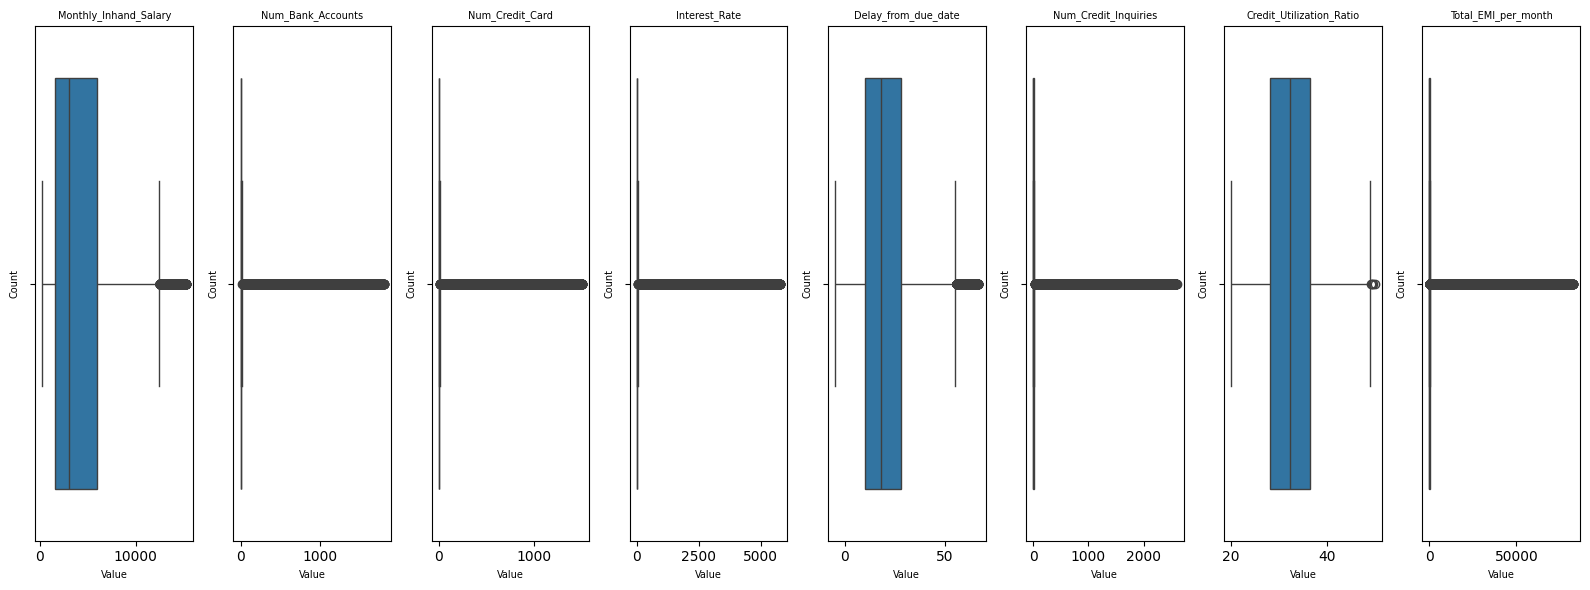

In [ ]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print("\nData Test\n")
print(data_test['Num_of_Loan'].value_counts())
print("\nData Train\n")
print(data_train['Num_of_Loan'].value_counts())


Data Test

Num_of_Loan
2.0    1243
3.0    1211
4.0    1206
0.0     731
1.0     649
6.0     547
5.0     501
7.0     457
9.0     171
8.0     152
Name: count, dtype: int64

Data Train

Num_of_Loan
3.0    7102
4.0    7058
2.0    6939
1.0    4313
0.0    4198
6.0    3322
5.0    3208
7.0    3058
9.0    1118
8.0     951
Name: count, dtype: int64


In [ ]:
# 1. Data Preprocess

#Menghappus _
data_train = train.applymap(lambda x: x.replace('_', '') if isinstance(x, str) else x)
data_test = test.applymap(lambda x: x.replace('_', '') if isinstance(x, str) else x)

#Melakukan EnCoding Categorical
categorical = ['Month',"Occupation","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour","Credit_Score"]
label_encoder = LabelEncoder()
for x in categorical[:-1]:
    data_test[x] = label_encoder.fit_transform(data_test[x])
for x in categorical:
    data_train[x] = label_encoder.fit_transform(data_train[x])

# Filter out negative values in numeric columns
data_test = data_test.apply(pd.to_numeric,errors='coerce')
data_test = data_test.applymap(lambda x: x if x >= 0 else None)
data_test.dropna(axis=0,inplace=True)

data_train = data_train.apply(pd.to_numeric,errors='coerce')
data_train = data_train.applymap(lambda x: x if x >= 0 else None)
data_train.dropna(axis=0,inplace=True)

# Calculate quartiles for each feature
quartiles1 = data_test.quantile([0.25, 0.75])
quartiles2 = data_train.quantile([0.25, 0.75])

# Calculate IQR (Interquartile Range) for each feature
IQR1 = quartiles1.loc[0.75] - quartiles1.loc[0.25]
IQR2 = quartiles2.loc[0.75] - quartiles2.loc[0.25]

# Define lower and upper bounds for each feature
lower_bound1 = (quartiles1.loc[0.25] - 1.5 * IQR1).to_dict()
upper_bound1 = (quartiles1.loc[0.75] + 1.5 * IQR1).to_dict()
lower_bound2 = (quartiles2.loc[0.25] - 1.5 * IQR2).to_dict()
upper_bound2 = (quartiles2.loc[0.75] + 1.5 * IQR2).to_dict()

# Filter out data points outside the bounds for each feature
filtered_data1 = data_test.copy()
for feature in data_test.columns:
    lower_bound_value1 = lower_bound1[feature]
    upper_bound_value1 = upper_bound1[feature]
    filtered_data1 = filtered_data1[(filtered_data1[feature] >= lower_bound_value1) & (filtered_data1[feature] <= upper_bound_value1)]
data_test = filtered_data1

filtered_data2 = data_train.copy()
for feature in data_train.columns:
    lower_bound_value2 = lower_bound2[feature]
    upper_bound_value2 = upper_bound2[feature]
    filtered_data2 = filtered_data2[(filtered_data2[feature] >= lower_bound_value2) & (filtered_data2[feature] <= upper_bound_value2)]
data_train = filtered_data2

In [ ]:
# 2. Machine Learning Models (Random Forest)

# Memilih fitur-fitur yang bukan tipe data integer untuk data train
X_train = data_train.drop('Credit_Score',axis=1)
y_train = data_train['Credit_Score']

# Memilih fitur-fitur yang sama untuk data test
X_test = data_test

# Membagi data train menjadi data latih dan data validasi
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_valid_rf = rf_model.predict(X_valid)

In [ ]:
# 3. Evaluation MSE dan RMSE
# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred_valid_rf)
print("Accuracy:", accuracy)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred_valid_rf)
print("Accuracy:", accuracy)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_valid, y_pred_valid_rf)
print("Mean Squared Error (MSE):", mse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_valid, y_pred_valid_rf)
print("Mean Absolute Error (MAE):", mae)

Accuracy: 0.7950084807366126
Accuracy: 0.7950084807366126
Mean Squared Error (MSE): 0.4521444148291737
Mean Absolute Error (MAE): 0.28737581778531623
